# Analysis based on the language of the speakers
The dataset has been divided into groups by following three different criteria:
    
- en_nation
- native
- proficiency

The evaluation considers the alignement between self-attention for the AD and the lexical units annotated.

In [1]:
from itertools import groupby
from collections import defaultdict

import utils

FOLDER_SPEAKERS_SUBSET = '../nlunetwork/results/speakers_split/results'
FOLDER_CONFIGURATION = 'eval_loss_both_slottype_full_we_large_recurrent_cell_lstm_attention_both_three_stages_true_highway___hyper:LABEL_EMB_SIZE=64,LSTM_SIZE=128,BATCH_SIZE=2,MAX_EPOCHS=100'
FOLDER_RES = 'huric_eb/speakers_split'

EN_NATION_TRUE = 'en_nation/true'
EN_NATION_FALSE = 'en_nation/false'
NATIVE_YES = 'native/yes'
NATIVE_WEAK = 'native/weak english speaker'
NATIVE_SOLID = 'native/solid english speaker'
PROFICIENCY_YES = 'proficiency/yes'
PROFICIENCY_NO = 'proficiency/no'

full_path = lambda x: '{}/{}/{}/{}'.format(FOLDER_SPEAKERS_SUBSET, FOLDER_CONFIGURATION, FOLDER_RES, x)

Sub-datasets complexities

In [2]:
BASE_XML_LOCATION = '../data/huric_eb/'
FULL_DATASET_LOCATION = BASE_XML_LOCATION + 'modern/source'
EN_NATION_TRUE_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + EN_NATION_TRUE + '/source'
EN_NATION_FALSE_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + EN_NATION_FALSE + '/source'
NATIVE_YES_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + NATIVE_YES + '/source'
NATIVE_WEAK_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + NATIVE_WEAK + '/source'
NATIVE_SOLID_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + NATIVE_SOLID + '/source'
PROFICIENCY_YES_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + PROFICIENCY_YES + '/source'
PROFICIENCY_NO_DATASET_LOCATION = BASE_XML_LOCATION + 'speakers_split/' + PROFICIENCY_NO + '/source'
full_stats = utils.get_corpus_complexity_statistics(FULL_DATASET_LOCATION)
en_true_stats = utils.get_corpus_complexity_statistics(EN_NATION_TRUE_DATASET_LOCATION)
en_false_stats = utils.get_corpus_complexity_statistics(EN_NATION_FALSE_DATASET_LOCATION)
native_yes_stats = utils.get_corpus_complexity_statistics(NATIVE_YES_DATASET_LOCATION)
native_weak_stats = utils.get_corpus_complexity_statistics(NATIVE_WEAK_DATASET_LOCATION)
native_solid_stats = utils.get_corpus_complexity_statistics(NATIVE_SOLID_DATASET_LOCATION)
proficiency_yes_stats = utils.get_corpus_complexity_statistics(PROFICIENCY_YES_DATASET_LOCATION)
proficiency_no_stats = utils.get_corpus_complexity_statistics(PROFICIENCY_NO_DATASET_LOCATION)

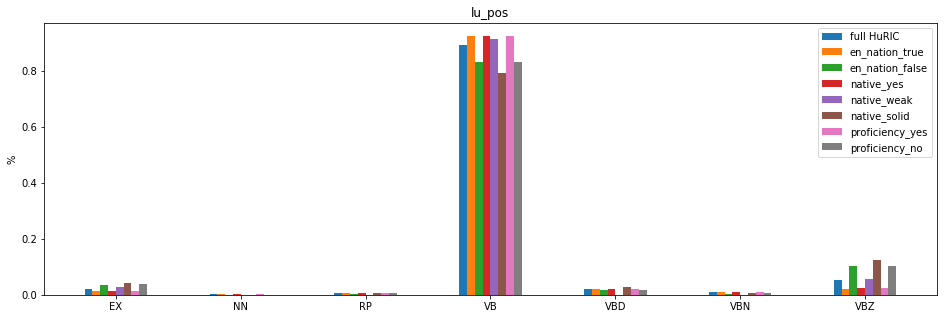

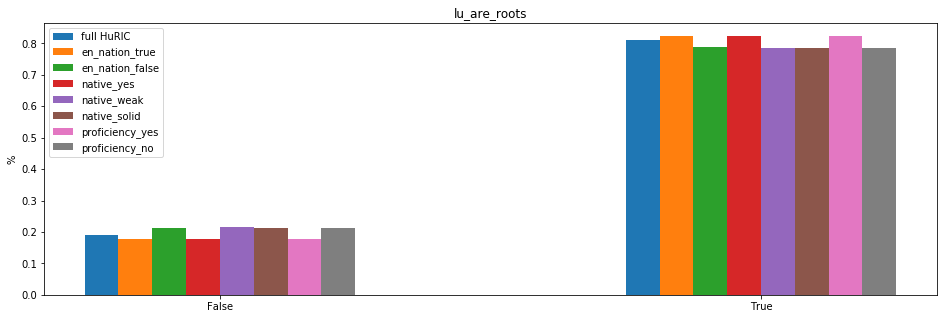

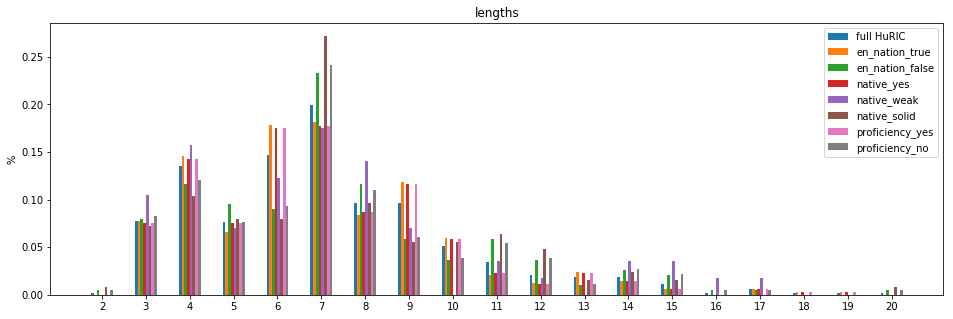

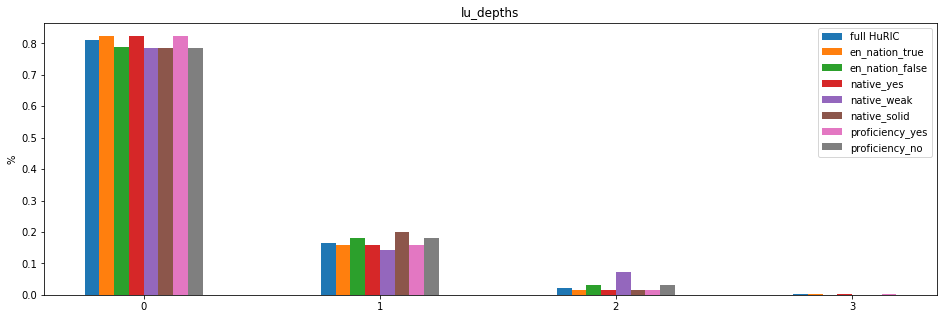

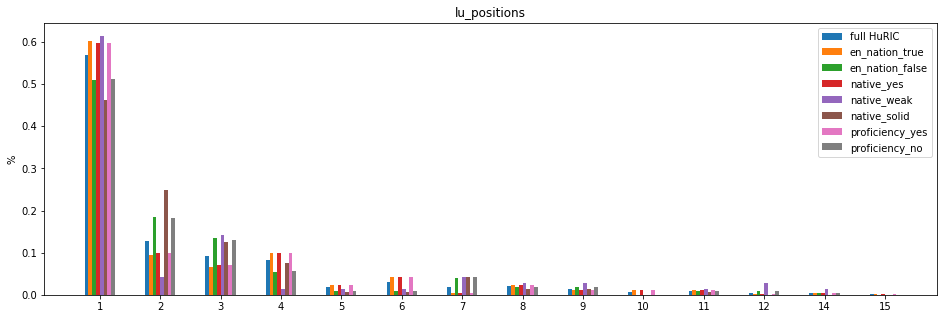

In [3]:
utils.plot_measures({
    'full HuRIC': full_stats,
    'en_nation_true': en_true_stats,
    'en_nation_false': en_false_stats,
    'native_yes': native_yes_stats,
    'native_weak': native_weak_stats,
    'native_solid': native_solid_stats,
    'proficiency_yes': proficiency_yes_stats,
    'proficiency_no': proficiency_no_stats
})

## en_nation

Speakers belonging to countries that have as primary language english. `['USA', 'Britain', 'Australia', 'Ireland']` 

### true

Being_located 1
[('the', 0.6845197677612305), ('to', 0.2515111267566681), ('a', 0.05477045476436615)]
Bringing 16
[('to', 0.2891697958111763), ('me', 0.28323464654386044), ('the', 0.11377083056504489)]
Change_operational_state 7
[('the', 0.5315200319247586), ('on', 0.10314503737858363), ('tap', 0.06476763742310661)]
Closure 3
[('open', 0.8718112508455912), ('the', 0.06621105410158634), ('washing', 0.029972918331623077)]
Entering 1
[('the', 0.9812426567077637), ('door', 0.011234819889068604), ('enter', 0.0067658135667443275)]
Following 2
[('the', 0.6919577419757843), ('to', 0.24603688716888428), ('living', 0.03236290067434311)]
Giving 1
[('me', 0.8034924268722534), ('the', 0.19623073935508728), ('towel', 0.00018850108608603477)]
Inspecting 1
[('is', 0.7708595991134644), ('machine', 0.21678142249584198), ('washing', 0.010114355944097042)]
Motion 12
[('the', 0.7015813690280387), ('to', 0.15959627057115236), ('go', 0.06379423047716652)]
Placing 6
[('the', 0.7000584483612329), ('washing', 0

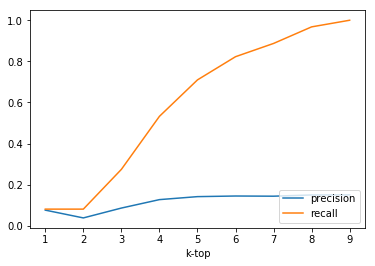

In [4]:
samples_en_nation_true = utils.load_json(full_path(EN_NATION_TRUE), 49)
groups_en_nation_true = utils.group_samples_by_frame(samples_en_nation_true)
for g_name, g_samples in groups_en_nation_true.items():
    print(g_name, len(g_samples))
    bow_sorted_attn = utils.get_words_by_attention(g_samples)
    print(bow_sorted_attn[:3])
print('lexical_unit score:', utils.align_accuracy_argmax(samples_en_nation_true))
_ = utils.align_score(samples_en_nation_true)

### false

Being_in_category 2
[('a', 0.36508179269731045), ('light', 0.1647913008928299), ('very', 0.10442093014717102)]
Being_located 3
[('the', 0.44752728939056396), ('one', 0.14896046121915182), ('facing', 0.09914954503377278)]
Bringing 8
[('the', 0.212102085002698), ('to', 0.20445560524240136), ('me', 0.1890171626000665)]
Following 5
[('follow', 0.7657612204551697), ('the', 0.07990849153138697), ('my', 0.0641615092754364)]
Motion 7
[('the', 0.6886352439011846), ('to', 0.11669916766030448), ('this', 0.08567578451974052)]
Placing 3
[('the', 0.608192193089053), ('table', 0.09889812270800273), ('newspaper', 0.06013454000155131)]
Searching 6
[('the', 0.28989577541748685), ('a', 0.2080505887667338), ('find', 0.15810208270947138)]
Taking 5
[('the', 0.5765726441983133), ('mobile', 0.11329203844070435), ('salt', 0.09284292459487915)]
lexical_unit score: 0.1282051282051282


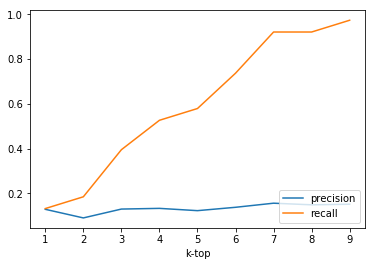

In [5]:
samples_en_nation_false = utils.load_json(full_path(EN_NATION_FALSE), 49)
groups_en_nation_false = utils.group_samples_by_frame(samples_en_nation_false)
for g_name, g_samples in groups_en_nation_false.items():
    print(g_name, len(g_samples))
    bow_sorted_attn = utils.get_words_by_attention(g_samples)
    print(bow_sorted_attn[:3])
print('lexical_unit score:', utils.align_accuracy_argmax(samples_en_nation_false))
_ = utils.align_score(samples_en_nation_false)

## native

### yes

lexical_unit score: 0.11594202898550725


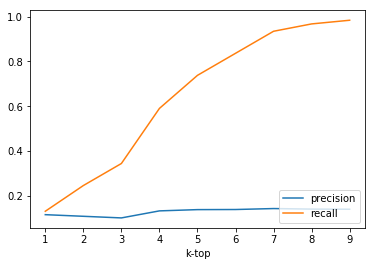

In [6]:
samples_native_yes = utils.load_json(full_path(NATIVE_YES), 49)
print('lexical_unit score:', utils.align_accuracy_argmax(samples_native_yes))
_ = utils.align_score(samples_native_yes)

### solid english speaker

lexical_unit score: 0.09090909090909091


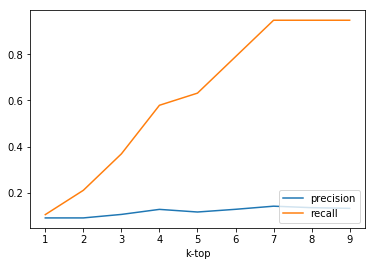

In [7]:
samples_native_solid = utils.load_json(full_path(NATIVE_SOLID), 49)
print('lexical_unit score:', utils.align_accuracy_argmax(samples_native_solid))
_ = utils.align_score(samples_native_solid)

### weak english speaker

lexical_unit score: 0.0


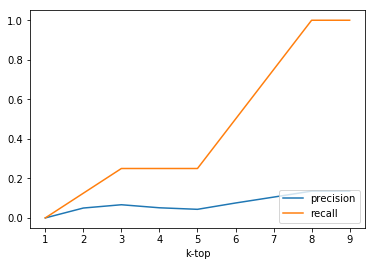

In [8]:
samples_native_weak = utils.load_json(full_path(NATIVE_WEAK), 49)
print('lexical_unit score:', utils.align_accuracy_argmax(samples_native_weak))
_ = utils.align_score(samples_native_weak)

## proficiency

### yes

lexical_unit score: 0.11594202898550725


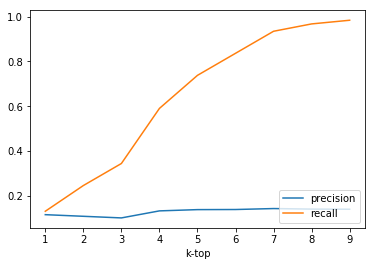

In [9]:
samples_proficiency_yes = utils.load_json(full_path(PROFICIENCY_YES), 49)
print('lexical_unit score:', utils.align_accuracy_argmax(samples_proficiency_yes))
_ = utils.align_score(samples_proficiency_yes)

### no

lexical_unit score: 0.25


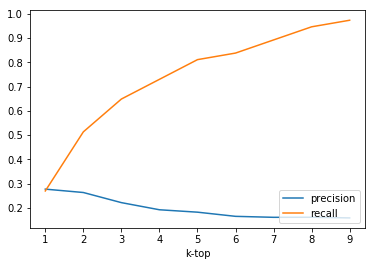

In [10]:
samples_proficiency_no = utils.load_json(full_path(PROFICIENCY_NO), 49)
print('lexical_unit score:', utils.align_accuracy_argmax(samples_proficiency_no))
_ = utils.align_score(samples_proficiency_no)